### Lorenz curves and heterogeneity in aggregation, and co-aggregation

[This paper](https://www.sciencedirect.com/science/article/pii/S0020751903001280?via=ihub#FIG2) talks about using Lorenz curves to graphically analyse whether aggregation, and also co-aggregation fits the 80:20 rule. Based on this, we can expect aggregation data to fit 80:20, and co-aggregation to have even greater heterogeneity.

The idea they used was to rank vertebrates based on their transmission potential.

The hosts are ranked on the total number of ticks aggregating.

Let:
- $ i \in [1,2,...,m] $ index the ranked vertebrates
- $ v_i $ is the proportion of ticks sampled on host $ i $
- $ h_i $ is the proportion of hosts (assume i/m)

Then

$ R_0 \propto \sum_{i=1}^m v_i^2 h_i $

Compare this to the traditional notion of aggregation:

$ R_0 \propto \sum_{i=1}^m v_i $

### Below are some attempts to understand the Perkins result

In [1]:
# Attempt 1

burdens = [21,17,11,2,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0]
v = sum(burdens)
print("Aggregation 20%: {}".format(sum(burdens[0:4])/v)) # So we know that this data looks like a lot of tick burden data
m = len(burdens)

transmission_potentials = []
for i in range(0,m):
    v_i = (burdens[i]/v)
    h_i = (i+1)/m # I interpret this as not being constant, but details are lacking
    transmission_potentials.append(v_i**2 * h_i)
transmission_potential_total = sum(transmission_potentials)

for h in range(1,m+1): #4/20 is 20%, should show 80% of transmission potential
    print((h)/m, sum(transmission_potentials[0:h])/transmission_potential_total)
# But it doesn't, so have I misinterpreted Perkins' formulation

Aggregation 20%: 0.8095238095238095
0.05 0.2893700787401575
0.1 0.6686351706036746
0.15 0.9068241469816273
0.2 0.9173228346456694
0.25 0.9206036745406824
0.3 0.9245406824146982
0.35 0.9291338582677166
0.4 0.9343832020997376
0.45 0.9402887139107613
0.5 0.9468503937007875
0.55 0.9540682414698163
0.6 0.9619422572178478
0.65 0.9704724409448819
0.7 0.9796587926509186
0.75 0.9895013123359581
0.8 1.0
0.85 1.0
0.9 1.0
0.95 1.0
1.0 1.0


In [2]:
# Attempt 2 - this time, remove burdens of 0

burdens = [21,17,11,2,1,1,1,1,1,1,1,1,1,1,1,1]
v = sum(burdens)
m = len(burdens)

transmission_potentials = []
for i in range(0,m):
    v_i = (burdens[i]/v)
    h_i = (i+1)/m # I interpret this as not being constant, but details are lacking
    transmission_potentials.append(v_i**2 * h_i)
transmission_potential_total = sum(transmission_potentials)

for h in range(1,m+1): #4/20 is 20%, should show 80% of transmission potential
    print((h)/m, sum(transmission_potentials[0:h])/transmission_potential_total)
# Again, doesn't match Perkins result

0.0625 0.2893700787401575
0.125 0.6686351706036747
0.1875 0.9068241469816273
0.25 0.9173228346456694
0.3125 0.9206036745406825
0.375 0.9245406824146982
0.4375 0.9291338582677166
0.5 0.9343832020997376
0.5625 0.9402887139107613
0.625 0.9468503937007875
0.6875 0.9540682414698164
0.75 0.9619422572178478
0.8125 0.9704724409448819
0.875 0.9796587926509187
0.9375 0.9895013123359581
1.0 1.0


In [3]:
# Attempt 3 - is h_i a constant?

burdens = [21,17,11,2,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0]
v = sum(burdens)
m = len(burdens)

transmission_potentials = []
for i in range(0,m):
    v_i = (burdens[i]/v)
    h_i = 1/m # I interpret this as not being constant, but details are lacking
    transmission_potentials.append(v_i**2 * h_i)
transmission_potential_total = sum(transmission_potentials)

for h in range(1,m+1): #4/20 is 20%, should show 80% of transmission potential
    print((h)/m, sum(transmission_potentials[0:h])/transmission_potential_total)
# Again, doesn't match Perkins result (even more hetergeneity)

0.05 0.5086505190311419
0.1 0.8419838523644753
0.15 0.9815455594002307
0.2 0.9861591695501731
0.25 0.9873125720876585
0.3 0.9884659746251442
0.35 0.9896193771626298
0.4 0.9907727797001153
0.45 0.991926182237601
0.5 0.9930795847750866
0.55 0.9942329873125721
0.6 0.9953863898500578
0.65 0.9965397923875432
0.7 0.9976931949250288
0.75 0.9988465974625145
0.8 1.0
0.85 1.0
0.9 1.0
0.95 1.0
1.0 1.0


In [4]:
# Attempt 4 - v_i instead of v_i**2

burdens = [21,17,11,2,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0]
v = sum(burdens)
m = len(burdens)

transmission_potentials = []
for i in range(0,m):
    v_i = (burdens[i]/v)
    h_i = (i+1)/m # I interpret this as not being constant, but details are lacking
    transmission_potentials.append(v_i * h_i)
transmission_potential_total = sum(transmission_potentials)

for h in range(1,m+1): #4/20 is 20%, should show 80% of transmission potential
    print((h)/m, sum(transmission_potentials[0:h])/transmission_potential_total)
# Again, doesn't match Perkins result (less hetergeneity), although the curve is still above the identity function

0.05 0.0945945945945946
0.1 0.24774774774774774
0.15 0.39639639639639646
0.2 0.43243243243243246
0.25 0.45495495495495497
0.3 0.48198198198198205
0.35 0.5135135135135136
0.4 0.5495495495495496
0.45 0.5900900900900901
0.5 0.6351351351351351
0.55 0.6846846846846848
0.6 0.7387387387387387
0.65 0.7972972972972974
0.7 0.8603603603603603
0.75 0.927927927927928
0.8 1.0
0.85 1.0
0.9 1.0
0.95 1.0
1.0 1.0


In [5]:
# Attempt 5 - just v_i, which is just the traditional notion of 80:20

burdens = [21,17,11,2,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0]
v = sum(burdens)
m = len(burdens)

transmission_potentials = []
for i in range(0,m):
    v_i = (burdens[i]/v)
    transmission_potentials.append(v_i)
transmission_potential_total = sum(transmission_potentials)

for h in range(1,m+1): #4/20 is 20%, should show 80% of transmission potential
    print((h)/m, sum(transmission_potentials[0:h])/transmission_potential_total)


0.05 0.3333333333333333
0.1 0.6031746031746031
0.15 0.7777777777777777
0.2 0.8095238095238095
0.25 0.8253968253968254
0.3 0.8412698412698412
0.35 0.8571428571428571
0.4 0.873015873015873
0.45 0.8888888888888888
0.5 0.9047619047619047
0.55 0.9206349206349206
0.6 0.9365079365079365
0.65 0.9523809523809523
0.7 0.9682539682539681
0.75 0.9841269841269841
0.8 1.0
0.85 1.0
0.9 1.0
0.95 1.0
1.0 1.0


In [6]:
# Attempt 6 - do they mean 1/h_i, as in Woolhouse etc

burdens = [21,17,11,2,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0]
v = sum(burdens)
m = len(burdens)

transmission_potentials = []
for i in range(0,m):
    v_i = (burdens[i]/v)
    h_i = (i+1)/m # I interpret this as not being constant, but details are lacking
    transmission_potentials.append(v_i**2 * (1/h_i))
transmission_potential_total = sum(transmission_potentials)

for h in range(1,m+1): #4/20 is 20%, should show 80% of transmission potential
    print((h)/m, sum(transmission_potentials[0:h])/transmission_potential_total)


0.05 0.7020831486891861
0.1 0.9321308017177289
0.15 0.9963424880301941
0.2 0.9979345133106684
0.25 0.9982529183667632
0.3 0.998518255913509
0.35 0.9987456880964339
0.4 0.9989446912564932
0.45 0.9991215829543237
0.5 0.9992807854823712
0.55 0.9994255150533234
0.6 0.9995581838266963
0.65 0.9996806473098095
0.7 0.9997943634012721
0.75 0.9999004984199704
0.8 1.0
0.85 1.0
0.9 1.0
0.95 1.0
1.0 1.0


So it looks to me like the only promising treatment is to remove the hosts that have no ticks.

### Tick-Verterbrate-Year combinations to analyse

Some datasets don't have enough ticks to analyse (see Kielder Forest analysis in thesis)

Analyse:
- 2004: I. ricinus, SA
- 2004: I. trianguliceps, SA
- 2005: I. trianguliceps, SA
- 2005: I. ricinus, FV
- 2005: I. trianguliceps, FV


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from coaggregation_offspring import get_aggregation_per_vertebrate, get_coaggregation_per_vertebrate_perkins, get_coaggregation_per_vertebrate_JR, get_larval_burden_per_vertebrate
from lorenz import get_Perkins_curve, get_JR_curve, gini_coefficient

### Difference between traditional notion of aggregation and Perkins calculation

This shows that the gini coefficient for both approaches is approximately the same, for whatever subset of Kielder Forest data you like

In [8]:
def plot_lorenz_curve_Perkins_And_Aggregation(data, title, remove_zero):
    if remove_zero:
        data = [x for x in data if x != 0]
    descending_data = sorted(data)
    descending_data.reverse()
    m = len(descending_data)
    v = sum(descending_data)
    removal_count = 100
    h_step = m/removal_count
    
    h_percent = list(range(1,removal_count+1))
    identity_function = [0.01 + (x * 0.01) for x in range(0, 100)]
    
    transmission_potential = []
    for i in list(range(0, m)):
        v_i = descending_data[i]/v
        h_i = (i+1)/m
        transmission_potential.append(v_i**2 * h_i)
    total_transmission_potential = sum(transmission_potential)

    # QUESTION - SHOULD WE SORT THE LIST ONCE THE CALCULATION IS DONE? THE INCREASING h_i TERM MEANS THIS LIST WILL BE UNSORTED
    # I SAY NO, IF YOU HAVE A LOOK AT THE PERKINS CHART, THE CURVE THAT INTERPOLATES THE POINTS IS NOT SMOOTH
    #print(transmission_potential)
    #transmission_potential = sorted(transmission_potential)
    #transmission_potential.reverse()
    #print(transmission_potential)
    
    aggregation_percentage = []
    transmission_potential_percentage = []
    
    for j in h_percent:
        h_j = round(j*h_step) # this many vertebrates in calculation
        v_j = sum(descending_data[0:h_j])/v
        # Traditional notion of aggregation - 20% of hosts support 80% of vertebrates
        aggregation_percentage.append(v_j)
    
        v_j = sum(transmission_potential[0:h_j])/total_transmission_potential
        transmission_potential_percentage.append(v_j)

    print(gini_coefficient(transmission_potential_percentage))
    print(gini_coefficient(aggregation_percentage))

    plt.plot(h_percent, transmission_potential_percentage, label="Perkins (transmission potential)", marker=".", markersize=2)
    plt.plot(h_percent, aggregation_percentage, label="Cumulative total", marker="s", markersize=2)
    plt.plot(h_percent, identity_function, label="Identity", marker="p", markersize=2)
    plt.vlines(20,0,1, linestyles="dotted")
    plt.xlabel("Percentage of hosts")
    plt.ylabel("Cumulative total of transmission potential")
    plt.title(title)
    plt.legend()
    plt.show()

Vertebrates:  3801
0.8310688142956935
0.8489869737148175


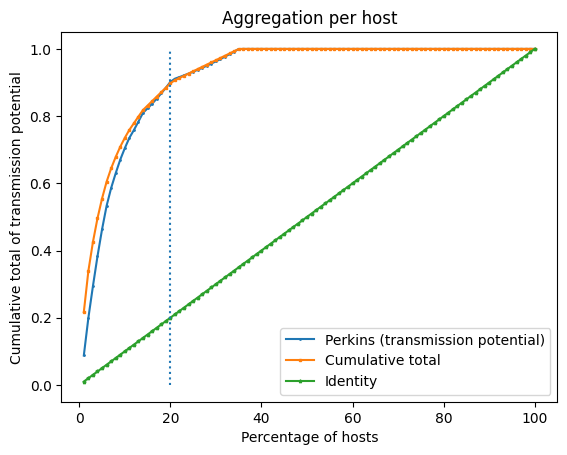

0.9736383423733187
0.9740029761904762


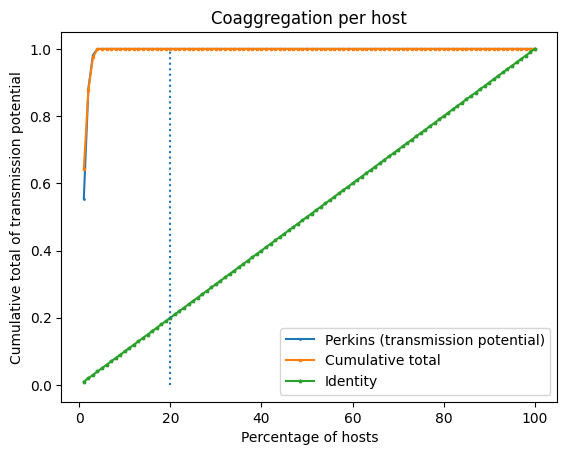

In [9]:
"""
Try this for any of the 5 combinations from the Kielder data, and the Perkins calculation 
more-or-less has the same Gini coefficient as the traditional notion of aggregation, although 
we should note that no subset of Kielder data follows 80:20
"""

df = pd.read_excel(open('Kielder_data_NGM.xlsx', 'rb'),
              sheet_name='Burden Data')

data = df[(df["Species"] == "SA") | (df["Species"] == "FV")]
#data = data[data["Year"] == 2004]
print("Vertebrates: ", len(data))
ricinus = True
trianguliceps = True

"""
Note: it's not clear to me whether Perkins et al considered only hosts that had some ticks, or all hosts. 
My guess is they considered all hosts. 
"""

aggregation_per_vertebrate = get_aggregation_per_vertebrate(data, ricinus=ricinus, trianguliceps=trianguliceps)
plot_lorenz_curve_Perkins_And_Aggregation(aggregation_per_vertebrate, "Aggregation per host", False)

coaggregation_per_vertebrate = get_coaggregation_per_vertebrate_perkins(data, ricinus=ricinus, trianguliceps=trianguliceps)
plot_lorenz_curve_Perkins_And_Aggregation(coaggregation_per_vertebrate, "Coaggregation per host", False)

### Using Perkins and modified Johnstone-Robertson calculations for Kielder Forest data

This makes the assumption that we have understood the use of "Co-feeding groups" correctly, which is implimented as aggregation involving at least one larva and one nymph.

For each subset of data, this also finds the Lorenz curve using the modified Johnston-Robertson calculation (see thesis for details).

In [37]:
def plot_Perkins_curves(aggregation_transmission_potential_percentages,
                        coaggregation_transmission_potential_percentages,
                        tick_species_display,
                        host_species_display,
                        years_display,
                        title=None):
    
    print("aggregeation transmission potential GINI (Perkins): ", gini_coefficient(aggregation_transmission_potential_percentages))
    print("coaggregeation transmission potential GINI (Perkins): ", gini_coefficient(coaggregation_transmission_potential_percentages))

    removal_count = 100
    h_percent = list(range(0,removal_count+1))
    identity_function = [(x * 0.01) for x in range(0, 101)]

    plt.plot(h_percent, coaggregation_transmission_potential_percentages, label="Co-feeding ticks", marker="s", markersize=2)
    plt.plot(h_percent, identity_function, label="Identity (homogeneous population)", marker="p", markersize=2)
    plt.plot(h_percent, aggregation_transmission_potential_percentages, label="Aggregating ticks", marker=".", markersize=2)
    plt.vlines(20,0,1, linestyles="dotted")
    plt.xlabel("Percentage of hosts removed")
    plt.ylabel("Proportion of transmission potential for hosts removed")
    plt.title(title)
    plt.legend()
    filename = "figs/lorenz_perkins_{}_{}_{}.png".format(years_display, tick_species_display, host_species_display).replace(" ", "").replace(",", "")
    plt.savefig(filename, dpi=300, bbox_inches="tight")
    plt.show()

def plot_JR_curve(coaggregation_transmission_potential_percentages,
                  tick_species_display,
                  host_species_display,
                  years_display,
                  title=None):

    print("coaggregeation transmission potential GINI (JR): ", gini_coefficient(coaggregation_transmission_potential_percentages))
    print("Transmission potentials", coaggregation_transmission_potential_percentages)
    
    removal_count = 100
    h_percent = list(range(0,removal_count+1))
    identity_function = [(x * 0.01) for x in range(0, 101)]

    plt.plot(h_percent, coaggregation_transmission_potential_percentages, label="Co-feeding ticks", marker="s", markersize=2)
    plt.plot(h_percent, identity_function, label="Identity (homogeneous population)", marker="p", markersize=2)
    plt.vlines(20,0,1, linestyles="dotted")
    plt.xlabel("Percentage of hosts removed")
    plt.ylabel("Proportion of transmission potential for hosts removed")
    plt.title(title)
    # plt.legend() # Perkins chart shares the same legend
    filename = "figs/lorenz_JR_{}_{}_{}.png".format(years_display, tick_species_display, host_species_display).replace(" ", "").replace(",", "")
    plt.savefig(filename, dpi=300, bbox_inches="tight")
    plt.show()

def get_charts_for_selected_data(data, ricinus, trianguliceps, tick_species_display, host_species_display, years_display):
    aggregation_per_vertebrate = get_aggregation_per_vertebrate(data, ricinus=ricinus, trianguliceps=trianguliceps)
    coaggregation_per_vertebrate_perkins = get_coaggregation_per_vertebrate_perkins(data, ricinus=ricinus, trianguliceps=trianguliceps)
    aggregation_transmission_potential_percentages_perkins = get_Perkins_curve(aggregation_per_vertebrate)
    coaggregation_transmission_potential_percentages_perkins = get_Perkins_curve(coaggregation_per_vertebrate_perkins)
    
    plot_Perkins_curves(aggregation_transmission_potential_percentages_perkins,
                        coaggregation_transmission_potential_percentages_perkins,
                        years_display,
                        tick_species_display,
                        host_species_display,
                        "Lorenz curves based on Perkins et al, 2003")
    
    larval_burdens_per_vertebrate = get_larval_burden_per_vertebrate(data, ricinus=ricinus, trianguliceps=trianguliceps)
    coaggregation_per_vertebrate_JR = get_coaggregation_per_vertebrate_JR(data, ricinus=ricinus, trianguliceps=trianguliceps)
    coaggregation_transmission_potential_percentages_JR = get_JR_curve(coaggregation_per_vertebrate_JR, larval_burdens_per_vertebrate)

    plot_JR_curve(coaggregation_transmission_potential_percentages_JR,
                  years_display,
                  tick_species_display,
                  host_species_display,
                  "Lorenz curve based on Johnstone-Robertson et al, 2020")

Vertebrates:  3801
aggregeation transmission potential GINI (Perkins):  0.8317941109919644
coaggregeation transmission potential GINI (Perkins):  0.9793878627653327


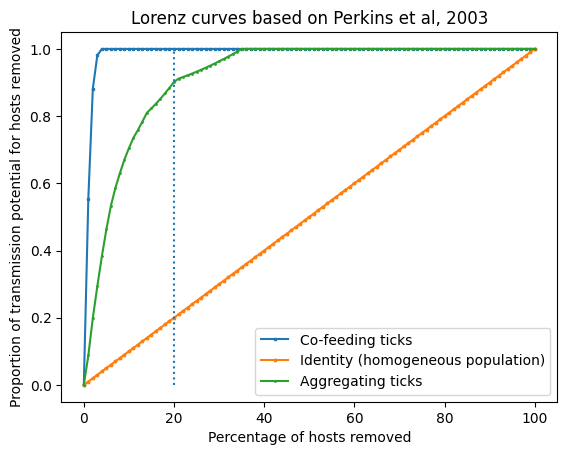

coaggregeation transmission potential GINI (JR):  0.987029288702929
Transmission potentials [0, 0.7945606694560668, 0.9523012552301254, 0.9928870292887029, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


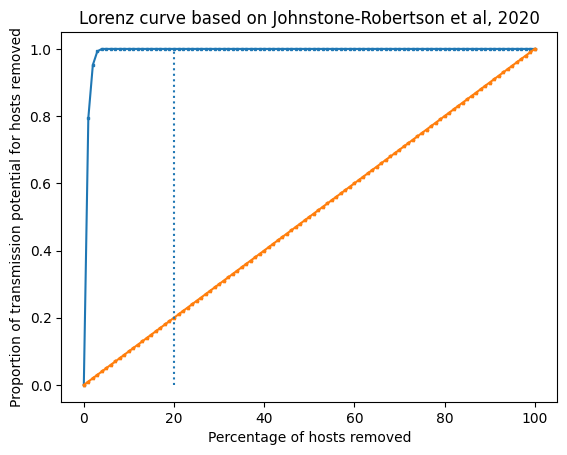

In [38]:
# First, do it for all data

df = pd.read_excel(open('Kielder_data_NGM.xlsx', 'rb'),
              sheet_name='Burden Data')

data = df[(df["Species"] == "SA") | (df["Species"] == "FV")]
#data = data[data["Year"] == 2004]
print("Vertebrates: ", len(data))
ricinus = True
trianguliceps = True

tick_species_display = "I. ricinus, I. trianguliceps"
host_species_display = "SA, FV"
years_display = "2004, 2005"

get_charts_for_selected_data(data, ricinus, trianguliceps, tick_species_display, host_species_display, years_display)


### Individual data (tick, host, year)

Vertebrates:  418
aggregeation transmission potential GINI (Perkins):  0.8599712392058032
coaggregeation transmission potential GINI (Perkins):  0.9879125683060107


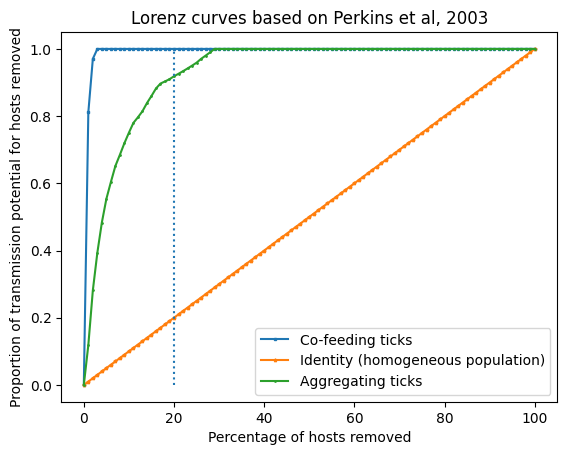

coaggregeation transmission potential GINI (JR):  0.9892121212121211
Transmission potentials [0, 0.8545454545454545, 0.9818181818181817, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


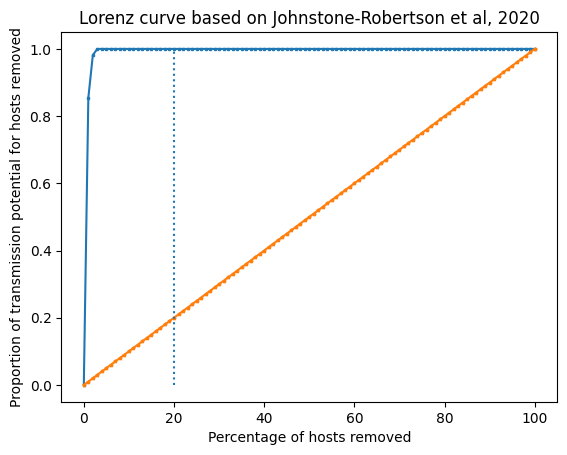

In [39]:
df = pd.read_excel(open('Kielder_data_NGM.xlsx', 'rb'),
              sheet_name='Burden Data')

data = df[(df["Species"] == "SA") ]
data = data[data["Year"] == 2004]
print("Vertebrates: ", len(data))
ricinus = True
trianguliceps = False

# First, do it for all data

tick_species_display = "I. ricinus"
host_species_display = "SA"
years_display = "2004"

get_charts_for_selected_data(data, ricinus, trianguliceps, tick_species_display, host_species_display, years_display)

Vertebrates:  418
aggregeation transmission potential GINI (Perkins):  0.7248347368563796
coaggregeation transmission potential GINI (Perkins):  0.9296182258502494


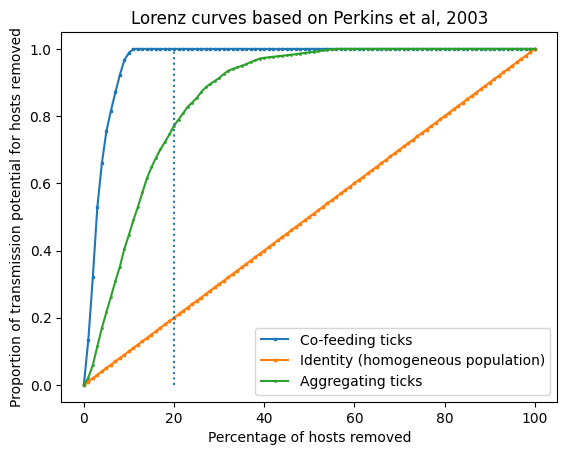

coaggregeation transmission potential GINI (JR):  0.9625523809523807
Transmission potentials [0, 0.5371428571428573, 0.672, 0.7771428571428571, 0.8411428571428571, 0.8891428571428572, 0.9268571428571429, 0.9520000000000001, 0.9702857142857143, 0.9874285714285715, 0.9954285714285716, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


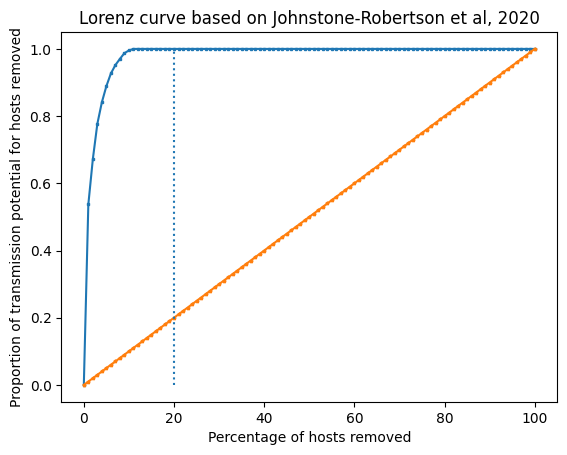

In [40]:
df = pd.read_excel(open('Kielder_data_NGM.xlsx', 'rb'),
              sheet_name='Burden Data')

data = df[(df["Species"] == "SA") ]
data = data[data["Year"] == 2004]
print("Vertebrates: ", len(data))
ricinus = False
trianguliceps = True

# First, do it for all data

tick_species_display = "I. Trianguliceps"
host_species_display = "SA"
years_display = "2004"

get_charts_for_selected_data(data, ricinus, trianguliceps, tick_species_display, host_species_display, years_display)

Vertebrates:  2079
aggregeation transmission potential GINI (Perkins):  0.9491124610937061
coaggregeation transmission potential GINI (Perkins):  0.9933333333333332


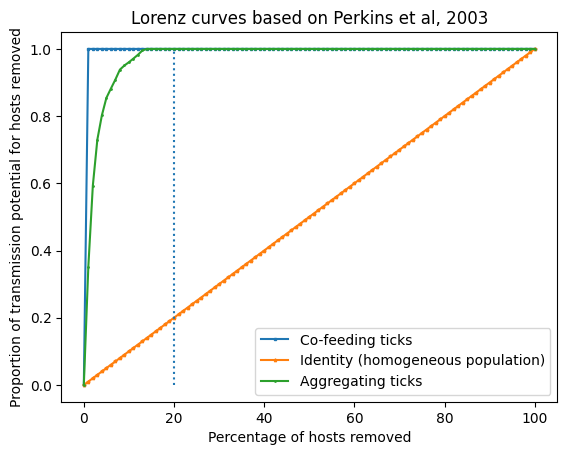

coaggregeation transmission potential GINI (JR):  0.9933333333333332
Transmission potentials [0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


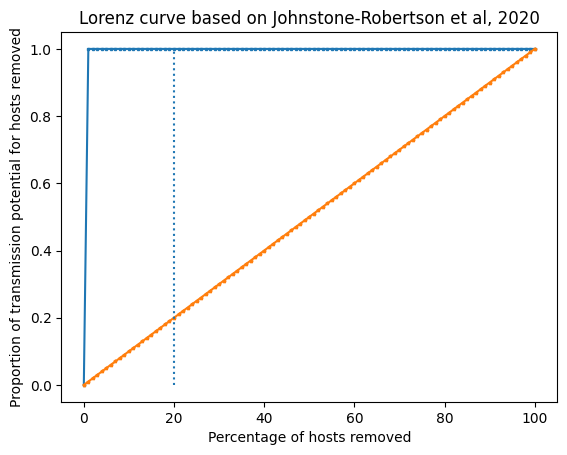

In [41]:
df = pd.read_excel(open('Kielder_data_NGM.xlsx', 'rb'),
              sheet_name='Burden Data')

data = df[(df["Species"] == "FV") ]
data = data[data["Year"] == 2005]
print("Vertebrates: ", len(data))
ricinus = True
trianguliceps = False

# First, do it for all data

tick_species_display = "I. Ricinus"
host_species_display = "FV"
years_display = "2005"

get_charts_for_selected_data(data, ricinus, trianguliceps, tick_species_display, host_species_display, years_display)

Vertebrates:  2079
aggregeation transmission potential GINI (Perkins):  0.8100385596626318
coaggregeation transmission potential GINI (Perkins):  0.9933333333333332


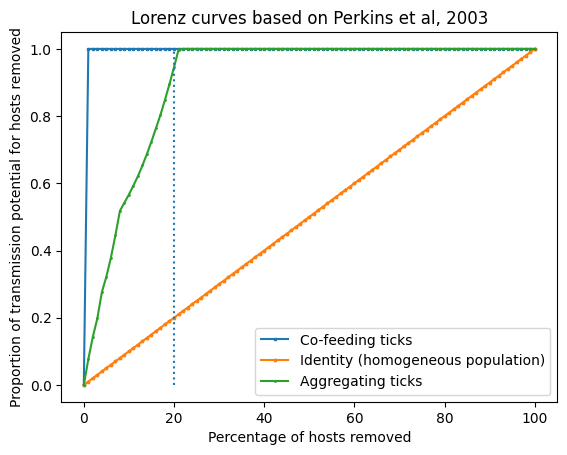

coaggregeation transmission potential GINI (JR):  0.9933333333333332
Transmission potentials [0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


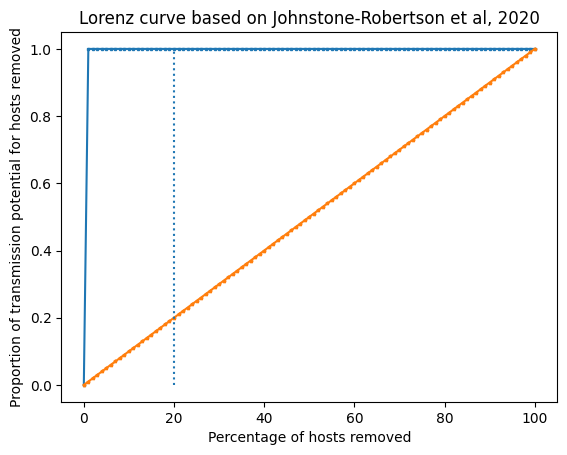

In [42]:
df = pd.read_excel(open('Kielder_data_NGM.xlsx', 'rb'),
              sheet_name='Burden Data')

data = df[(df["Species"] == "FV") ]
data = data[data["Year"] == 2005]
print("Vertebrates: ", len(data))
ricinus = False
trianguliceps = True

# First, do it for all data

tick_species_display = "I. Trianguliceps"
host_species_display = "FV"
years_display = "2005"

get_charts_for_selected_data(data, ricinus, trianguliceps, tick_species_display, host_species_display, years_display)

Vertebrates:  458
aggregeation transmission potential GINI (Perkins):  0.8731070282308246
coaggregeation transmission potential GINI (Perkins):  0.9732507176363506


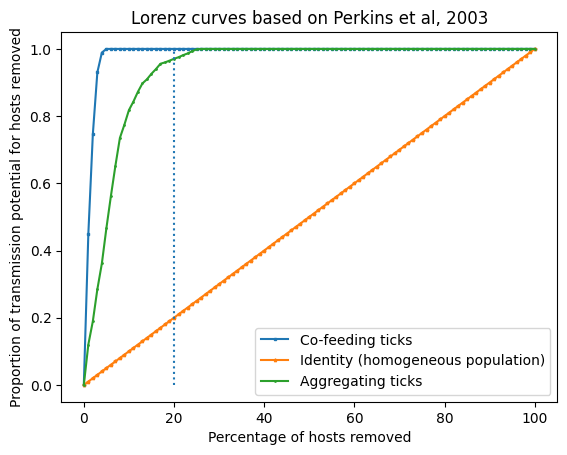

coaggregeation transmission potential GINI (JR):  0.9843157894736843


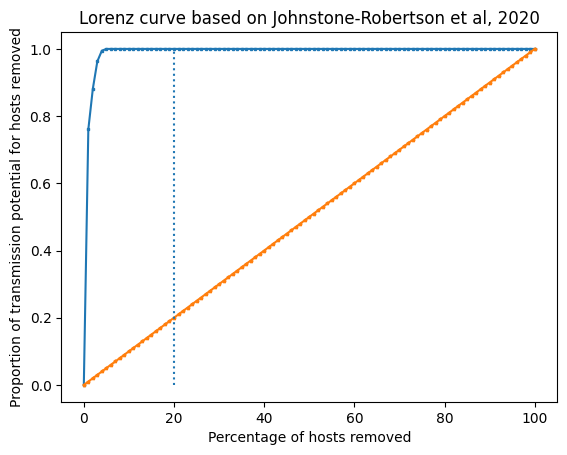

In [29]:
df = pd.read_excel(open('Kielder_data_NGM.xlsx', 'rb'),
              sheet_name='Burden Data')

data = df[(df["Species"] == "SA") ]
data = data[data["Year"] == 2005]
print("Vertebrates: ", len(data))
ricinus = False
trianguliceps = True

# First, do it for all data

tick_species_display = "I. Trianguliceps"
host_species_display = "SA"
years_display = "2005"

get_charts_for_selected_data(data, ricinus, trianguliceps, tick_species_display, host_species_display, years_display)

It seems these aren't as useful as we would have liked. Going with the decision that the modified J-R curves are more useful and insightful, we will plot 2 charts for each combination of tick, host and year:
- a lorenz curve of aggregation for that combination
- a lorenz curve of transmission potential, zoomed in to see the top 20% of vertebrate hosts. In this case, step sizes should be 0.2 of vertebrate hosts, to get 100 steps for removal (as Perkins et al did).

In [30]:
from lorenz import get_aggregation_curve, gini_coefficient

def plot_aggregation_curve(aggregation_percentages,
                           tick_species_display,
                           host_species_display,
                           years_display,
                           title=None):
    
    print("aggregeation GINI: ", gini_coefficient(aggregation_percentages))

    removal_count = 100
    h_percent = list(range(0,removal_count+1))
    identity_function = [(x * 0.01) for x in range(0, 101)]

    plt.plot(h_percent, aggregation_percentages, label="Aggregation", marker="s", markersize=2)
    plt.plot(h_percent, identity_function, label="Identity (homogeneous population)", marker="p", markersize=2)
    plt.vlines(20,0,1, linestyles="dotted")
    plt.xlabel("Percentage of hosts removed")
    plt.ylabel("Proportion of aggregation for hosts removed")
    plt.title(title)
    plt.legend()
    filename = "figs/lorenz_aggregation_{}_{}_{}.png".format(years_display, tick_species_display, host_species_display).replace(" ", "").replace(",", "")
    plt.savefig(filename, dpi=300, bbox_inches="tight")
    plt.show()

def plot_JR_curve(coaggregation_transmission_potential_percentages,
                  tick_species_display,
                  host_species_display,
                  years_display,
                  title=None):
    
    print("coaggregeation transmission potential GINI: ", gini_coefficient(coaggregation_transmission_potential_percentages))

    removal_count = 100
    h_percent = list(range(1,removal_count+1))
    identity_function = [0.01 + (x * 0.01) for x in range(0, 100)]

    plt.plot(h_percent, coaggregation_transmission_potential_percentages, label="Co-feeding ticks", marker="s", markersize=2)
    plt.plot(h_percent, identity_function, label="Identity (homogeneous population)", marker="p", markersize=2)
    plt.vlines(20,0,1, linestyles="dotted")
    plt.xlabel("Percentage of hosts removed")
    plt.ylabel("Proportion of transmission potential for hosts removed")
    plt.title(title)
    # plt.legend() # Perkins chart shares the same legend
    filename = "figs/lorenz_JR_{}_{}_{}.png".format(years_display, tick_species_display, host_species_display).replace(" ", "").replace(",", "")
    plt.savefig(filename, dpi=300, bbox_inches="tight")
    plt.show()

# Redefine this function
def get_charts_for_selected_data(data, ricinus, trianguliceps, tick_species_display, host_species_display, years_display):
    aggregation_per_vertebrate = get_aggregation_per_vertebrate(data, ricinus=ricinus, trianguliceps=trianguliceps)
    aggregation_percentages = get_aggregation_curve(aggregation_per_vertebrate)

    plot_aggregation_curve(aggregation_percentages,
                           years_display,
                           tick_species_display,
                           host_species_display,
                           "Lorenz curve of aggregation per vertebrate host")

    """
    larval_burdens_per_vertebrate = get_larval_burden_per_vertebrate(data, ricinus=ricinus, trianguliceps=trianguliceps)
    coaggregation_per_vertebrate_JR = get_coaggregation_per_vertebrate_JR(data, ricinus=ricinus, trianguliceps=trianguliceps)
    coaggregation_transmission_potential_percentages_JR = get_JR_curve(coaggregation_per_vertebrate_JR, larval_burdens_per_vertebrate)

    plot_JR_curve(coaggregation_transmission_potential_percentages_JR,
                  years_display,
                  tick_species_display,
                  host_species_display,
                  "Lorenz curve based on Johnstone-Robertson et al, 2020")
    """

Vertebrates:  3801
aggregeation GINI:  0.8513817166782974


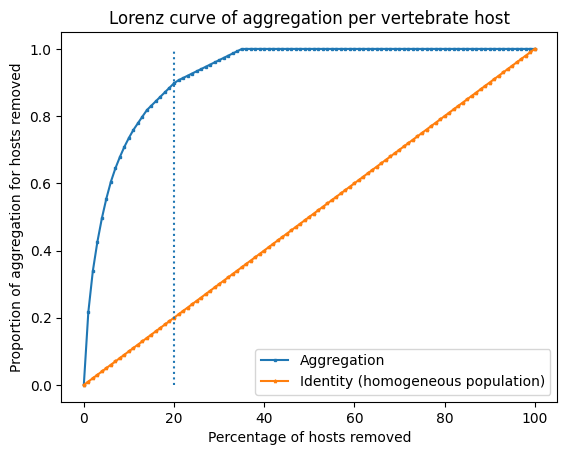

In [31]:
# First, do it for all data

df = pd.read_excel(open('Kielder_data_NGM.xlsx', 'rb'),
              sheet_name='Burden Data')

data = df[(df["Species"] == "SA") | (df["Species"] == "FV")]
#data = data[data["Year"] == 2004]
print("Vertebrates: ", len(data))
ricinus = True
trianguliceps = True

tick_species_display = "I. ricinus, I. trianguliceps"
host_species_display = "SA, FV"
years_display = "2004, 2005"

get_charts_for_selected_data(data, ricinus, trianguliceps, tick_species_display, host_species_display, years_display)


### Individual data (tick, host, year)

Vertebrates:  418
aggregeation GINI:  0.8708960573476702


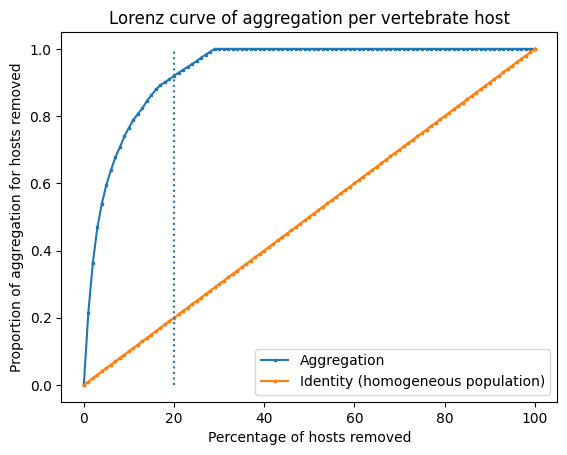

In [32]:
df = pd.read_excel(open('Kielder_data_NGM.xlsx', 'rb'),
              sheet_name='Burden Data')

data = df[(df["Species"] == "SA") ]
data = data[data["Year"] == 2004]
print("Vertebrates: ", len(data))
ricinus = True
trianguliceps = False

# First, do it for all data

tick_species_display = "I. ricinus"
host_species_display = "SA"
years_display = "2004"

get_charts_for_selected_data(data, ricinus, trianguliceps, tick_species_display, host_species_display, years_display)

Vertebrates:  418
aggregeation GINI:  0.7472550382209866


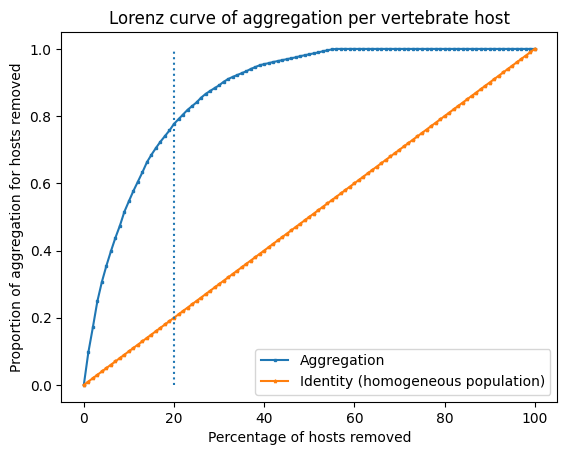

In [33]:
df = pd.read_excel(open('Kielder_data_NGM.xlsx', 'rb'),
              sheet_name='Burden Data')

data = df[(df["Species"] == "SA") ]
data = data[data["Year"] == 2004]
print("Vertebrates: ", len(data))
ricinus = False
trianguliceps = True

# First, do it for all data

tick_species_display = "I. Trianguliceps"
host_species_display = "SA"
years_display = "2004"

get_charts_for_selected_data(data, ricinus, trianguliceps, tick_species_display, host_species_display, years_display)

Vertebrates:  2079
aggregeation GINI:  0.9500944669365723


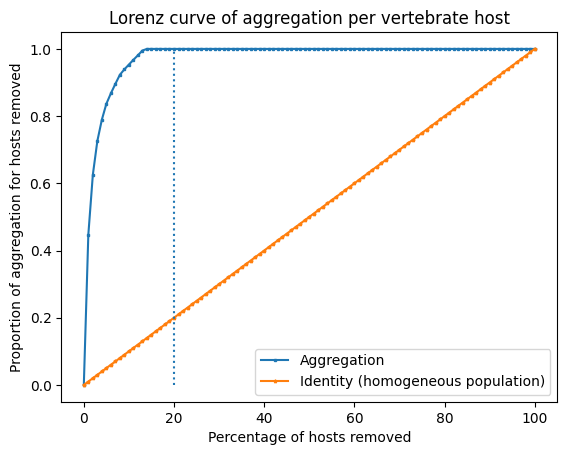

In [34]:
df = pd.read_excel(open('Kielder_data_NGM.xlsx', 'rb'),
              sheet_name='Burden Data')

data = df[(df["Species"] == "FV") ]
data = data[data["Year"] == 2005]
print("Vertebrates: ", len(data))
ricinus = True
trianguliceps = False

# First, do it for all data

tick_species_display = "I. Ricinus"
host_species_display = "FV"
years_display = "2005"

get_charts_for_selected_data(data, ricinus, trianguliceps, tick_species_display, host_species_display, years_display)

Vertebrates:  2079
aggregeation GINI:  0.8687252573238317


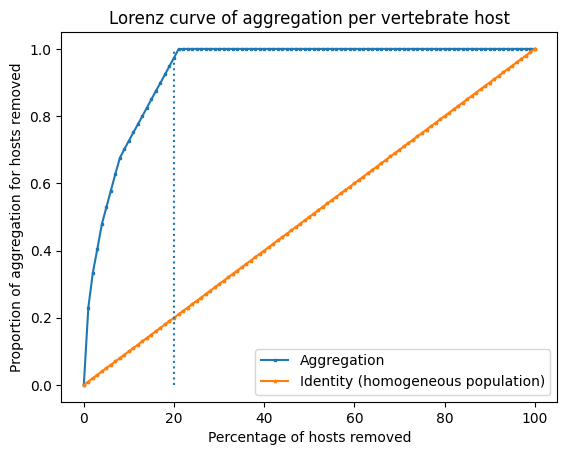

In [35]:
df = pd.read_excel(open('Kielder_data_NGM.xlsx', 'rb'),
              sheet_name='Burden Data')

data = df[(df["Species"] == "FV") ]
data = data[data["Year"] == 2005]
print("Vertebrates: ", len(data))
ricinus = False
trianguliceps = True

# First, do it for all data

tick_species_display = "I. Trianguliceps"
host_species_display = "FV"
years_display = "2005"

get_charts_for_selected_data(data, ricinus, trianguliceps, tick_species_display, host_species_display, years_display)

Vertebrates:  458
aggregeation GINI:  0.8853807106598984


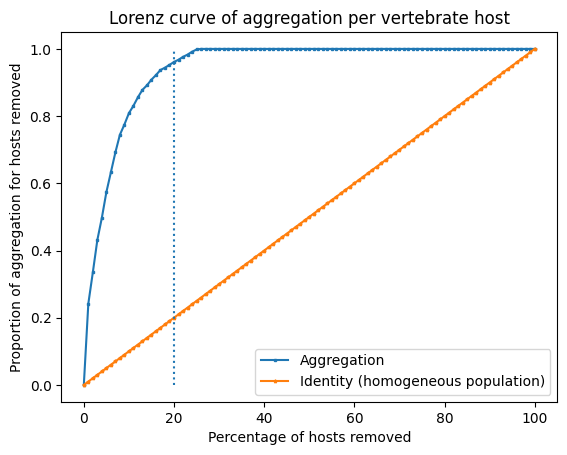

In [36]:
df = pd.read_excel(open('Kielder_data_NGM.xlsx', 'rb'),
              sheet_name='Burden Data')

data = df[(df["Species"] == "SA") ]
data = data[data["Year"] == 2005]
print("Vertebrates: ", len(data))
ricinus = False
trianguliceps = True

# First, do it for all data

tick_species_display = "I. Trianguliceps"
host_species_display = "SA"
years_display = "2005"

get_charts_for_selected_data(data, ricinus, trianguliceps, tick_species_display, host_species_display, years_display)